<a href="https://colab.research.google.com/github/vathsal14/NOVO-NEUROTECH/blob/main/novonew3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install requests
# Installs the 'requests' library, which is used for making HTTP requests in Python. It simplifies interacting with web services and APIs.
# version: requests-2.32.3
!pip install mne
# Installs the 'mne' library, which is a powerful tool for processing, analyzing, and visualizing EEG, MEG, and other neurophysiological data.
# version: mne-1.9.0
!pip install pyedflib
# Installs the 'pyedflib' library, which allows reading and writing of EDF (European Data Format) and BDF (Biosemi Data Format) files, commonly used in EEG data storage.
# version: pyedflib-0.1.38
!pip install openneuro-py
# Installs the 'openneuro-py' library, a Python client for accessing and downloading datasets from OpenNeuro, a platform for neuroimaging data sharing.
# aiofiles-24.1.0 graphql-core-3.2.5 openneuro-py-2024.2.0 sgqlc-16.4
!pip install PyWavelets
# Installs the 'PyWavelets' library, which provides wavelet transform functions for signal processing, including denoising, feature extraction, and compression.
# version: PyWavelets-1.8.0

In [ ]:
# Importing the Google Colab drive module
from google.colab import drive
# Mounting Google Drive to the Colab environment
# This allows you to access files stored in your Google Drive directly from the Colab notebook.
# The "/content/drive" is the directory where the Drive will be mounted.
# After mounting, you can interact with your Drive files as if they were local files.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install python-dotenv
# 'python-dotenv' is a library that allows you to manage environment variables from a `.env` file.
# This is particularly useful for securely storing sensitive information such as API keys, database credentials, etc.
# By using environment variables, you avoid hardcoding sensitive data directly in your code.

In [ ]:
import os  # The 'os' module is used to interact with the operating system, such as reading environment variables.
from dotenv import load_dotenv  # 'load_dotenv' is used to load environment variables from a .env file.
# Specify the path to the .env file
# The .env file stores environment variables like API keys securely.
# In this case, the .env file is located in the user's Google Drive.
env_path = '/content/drive/My Drive/ColabEnvFiles/API_KEY.env'
# Load the environment variables from the specified .env file
load_dotenv(env_path)
# Access the API key using the key name as defined in the .env file
api_key = os.getenv("OPENNEURO_API_KEY")
# Check if the API key was successfully loaded
if api_key:
    print("API Key loaded successfully!")  # Inform the user that the API key was loaded.
else:
    print("Failed to load API Key. Check your .env file and path.")  # Error message if loading fails.

API Key loaded successfully!


In [ ]:
import os
import openneuro

# Prompt the user to enter the dataset ID
dataset_id = input("Enter the dataset ID (e.g., ds002778): ")

# Validate the input
if not dataset_id:
    raise ValueError("Dataset ID must be provided.")

print(f"Processing dataset: {dataset_id}")

# Function to create a directory
def create_directory(dir_path):
    try:
        # Attempt to create the directory
        os.makedirs(dir_path, exist_ok=True)
        print(f"Directory created successfully at: {dir_path}")
    except PermissionError:
        # Handle permission errors
        print(f"Permission denied: Unable to create directory at {dir_path}. Please check permissions.")
    except OSError as e:
        # Handle other OS-related errors
        print(f"Error creating directory at {dir_path}: {e}")
    except Exception as e:
        # Catch any unexpected errors
        print(f"An unexpected error occurred: {e}")

# Determine the target directory for the download
target_dir = os.path.join(os.getcwd(), dataset_id)

# Create the target directory
create_directory(target_dir)

# Download the entire dataset
openneuro.download(dataset=dataset_id, target_dir=target_dir)

print(f"Dataset {dataset_id} downloaded successfully to {target_dir}.")


Enter the dataset ID (e.g., ds002778): ds002778
Processing dataset: ds002778
Directory created successfully at: /content/ds002778

👋 Hello! This is openneuro-py 2024.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds002778 …


📁 Traversing directories for ds002778 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 328 files (5 concurrent downloads). 
✅ Finished downloading ds002778.
 
🧠 Please enjoy your brains.
 
Dataset ds002778 downloaded successfully to /content/ds002778.


In [ ]:
import os
target_dir = '/content/ds002778'
raw_fname = target_dir

for subject_folder in os.listdir(raw_fname):

    if subject_folder.startswith('sub-'):
        subject_id = subject_folder.split('-')[1]
        print(f"Processing subject: {subject_id}")

        if subject_id.startswith('pd'):
            session_path = os.path.join(raw_fname, subject_folder, 'ses-off', 'eeg')
            session_type = 'ses-off'
        elif subject_id.startswith('hc'):
            session_path = os.path.join(raw_fname, subject_folder, 'ses-hc', 'eeg')
            session_type = 'ses-hc'
        else:
            print(f"Unknown subject type for {subject_id}. Skipping.")
            continue

        if not os.path.exists(session_path):
            print(f"No '{session_type}/eeg' folder found for subject {subject_id}. Skipping.")
            continue

        bdf_file = None
        for file in os.listdir(session_path):
            if file.endswith('.bdf') and f"sub-{subject_id}" in file:
                bdf_file = os.path.join(session_path, file)
                break

        if bdf_file:
            print(f"Found EEG file for subject {subject_id} ({session_type}): {bdf_file}")
        else:
            print(f"EEG .bdf file not found for subject {subject_id} in {session_type} session.")

Processing subject: pd26
EEG .bdf file not found for subject pd26 in ses-off session.
Processing subject: hc29
Found EEG file for subject hc29 (ses-hc): /content/ds002778/sub-hc29/ses-hc/eeg/sub-hc29_ses-hc_task-rest_eeg.bdf
Processing subject: pd13
Found EEG file for subject pd13 (ses-off): /content/ds002778/sub-pd13/ses-off/eeg/sub-pd13_ses-off_task-rest_eeg.bdf
Processing subject: hc1
Found EEG file for subject hc1 (ses-hc): /content/ds002778/sub-hc1/ses-hc/eeg/sub-hc1_ses-hc_task-rest_eeg.bdf
Processing subject: pd23
EEG .bdf file not found for subject pd23 in ses-off session.
Processing subject: hc10
Found EEG file for subject hc10 (ses-hc): /content/ds002778/sub-hc10/ses-hc/eeg/sub-hc10_ses-hc_task-rest_eeg.bdf
Processing subject: hc32
Found EEG file for subject hc32 (ses-hc): /content/ds002778/sub-hc32/ses-hc/eeg/sub-hc32_ses-hc_task-rest_eeg.bdf
Processing subject: hc21
Found EEG file for subject hc21 (ses-hc): /content/ds002778/sub-hc21/ses-hc/eeg/sub-hc21_ses-hc_task-rest_eeg

sub-pd22_ses-off_scans.tsv:   0%|          | 0.00/76.0 [00:00<?, ?B/s]

In [ ]:
import os

raw_fname = target_dir

for subject_folder in os.listdir(raw_fname):
    if subject_folder.startswith('sub-'):
        subject_id = subject_folder.split('-')[1]
        print(f"Processing subject: {subject_id}")

        if subject_id.startswith('pd'):
            session_path = os.path.join(raw_fname, subject_folder, 'ses-off', 'eeg')
            session_type = 'ses-off'
        elif subject_id.startswith('hc'):
            session_path = os.path.join(raw_fname, subject_folder, 'ses-hc', 'eeg')
            session_type = 'ses-hc'
        else:
            print(f"Unknown subject type for {subject_id}. Skipping.")
            continue

        if not os.path.exists(session_path):
            print(f"No '{session_type}/eeg' folder found for subject {subject_id}. Skipping.")
            continue

        bdf_file = None
        for file in os.listdir(session_path):
            if file.endswith('.bdf') and f"sub-{subject_id}" in file:
                bdf_file = os.path.join(session_path, file)
                break

        if bdf_file:
            print(f"Found EEG file for subject {subject_id} ({session_type}): {bdf_file}")
            try:
                with open(bdf_file, 'rb') as f:
                    header = f.read(256)
                    print(f"Header for subject {subject_id}:\n{header}")
            except Exception as e:
                print(f"Error reading file {bdf_file}: {e}")
        else:
            print(f"EEG .bdf file not found for subject {subject_id} in {session_type} session.")


Processing subject: pd26
Found EEG file for subject pd26 (ses-off): /content/ds002778/sub-pd26/ses-off/eeg/sub-pd26_ses-off_task-rest_eeg.bdf
Header for subject pd26:
b'\xffBIOSEMI                                                                                                                                                                13.06.1112.00.2510752   24BIT                                       191     1       41  '
Processing subject: hc29
Found EEG file for subject hc29 (ses-hc): /content/ds002778/sub-hc29/ses-hc/eeg/sub-hc29_ses-hc_task-rest_eeg.bdf
Header for subject hc29:
b'\xffBIOSEMI                                                                                                                                                                10.06.1113.05.3710752   24BIT                                       199     1       41  '
Processing subject: pd13
Found EEG file for subject pd13 (ses-off): /content/ds002778/sub-pd13/ses-off/eeg/sub-pd13_ses-off_task-rest_eeg.bdf
H

Number of channels: 41
Sampling frequency: 512.0 Hz
File duration: 188.0 seconds


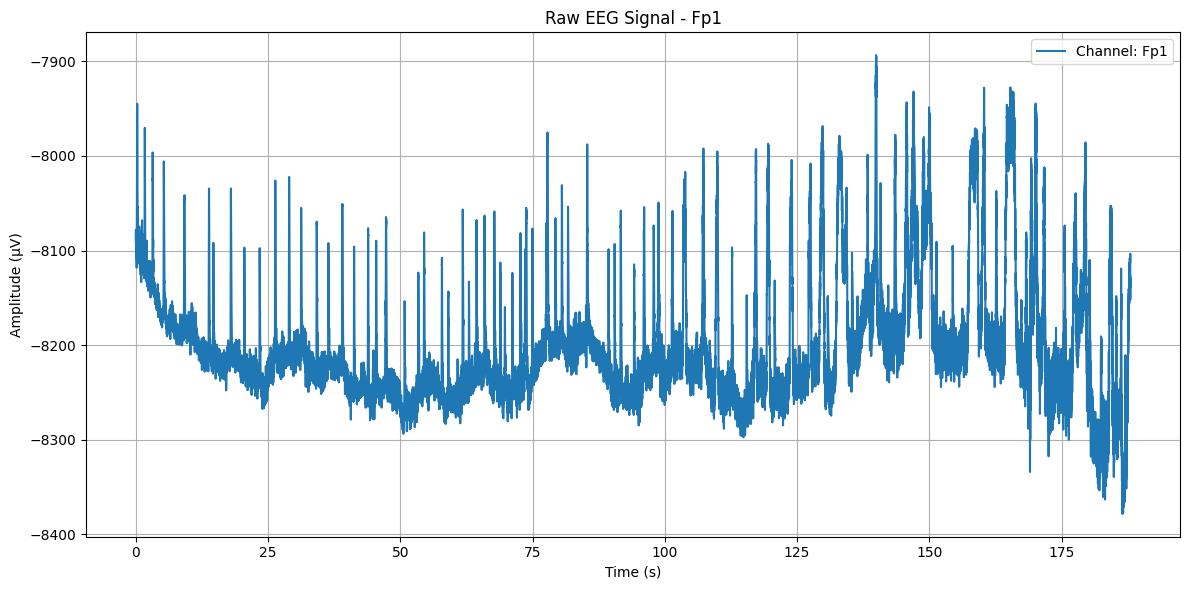

In [ ]:
import pyedflib
import matplotlib.pyplot as plt
import numpy as np

bdf_file = "/content/ds002778/sub-pd22/ses-off/eeg/sub-pd22_ses-off_task-rest_eeg.bdf"

try:

    with pyedflib.EdfReader(bdf_file) as f:
        n_channels = f.signals_in_file
        sample_frequency = f.getSampleFrequencies()[0]
        duration = f.file_duration
        print(f"Number of channels: {n_channels}")
        print(f"Sampling frequency: {sample_frequency} Hz")
        print(f"File duration: {duration} seconds")

        channel = 0
        signal = f.readSignal(channel)
        label = f.getLabel(channel)

    time = np.linspace(0, len(signal) / sample_frequency, len(signal))

    plt.figure(figsize=(12, 6))
    plt.plot(time, signal, label=f"Channel: {label}")
    plt.title(f"Raw EEG Signal - {label}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (µV)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error reading or plotting BDF file: {e}")

In [54]:
# import os
# import mne
# import pandas as pd
# import numpy as np
# from scipy.signal import welch
# import matplotlib.pyplot as plt

# # Path to the dataset
# target_dir = "/content/ds002778"  # Replace with your dataset path
# subject_dirs = [d for d in os.listdir(target_dir) if d.startswith('sub-')]

# print(f"Found {len(subject_dirs)} subjects in the dataset.")

# features_list = []
# epoch_length_sec = 5  # Length of each epoch in seconds

# # Frequency bands
# freq_bands = {
#     'delta': (1, 4),
#     'theta': (4, 8),
#     'alpha': (8, 12),
#     'beta': (12, 30),
#     'gamma': (30, 50)
# }

# # Function to compute band power
# def compute_band_power(epoch_data, sfreq, freq_bands):
#     power_features = {}
#     for band, (low, high) in freq_bands.items():
#         # Calculate PSD for each channel
#         f, psd = welch(epoch_data, sfreq, nperseg=1024)

#         # Apply the frequency band mask across all frequency bins
#         band_mask = (f >= low) & (f <= high)

#         # Sum the power across the frequency band
#         power = np.sum(psd[:, band_mask], axis=1)  # Sum along frequency axis
#         power_features[f'{band}_power'] = np.mean(power)  # Mean power across channels
#     return power_features

# for subject in subject_dirs:
#     print(f"\nProcessing subject: {subject}")

#     # Define the file path for the EEG data
#     if 'sub-pd' in subject:
#         raw_fname = os.path.join(target_dir, subject, 'ses-off', 'eeg', f'{subject}_ses-off_task-rest_eeg.bdf')
#     else:
#         raw_fname = os.path.join(target_dir, subject, 'ses-hc', 'eeg', f'{subject}_ses-hc_task-rest_eeg.bdf')

#     if not os.path.exists(raw_fname):
#         print(f"EEG data file not found for {subject}. Skipping.")
#         continue

#     try:
#         # Load the raw EEG data
#         raw = mne.io.read_raw_bdf(raw_fname, preload=True)
#         raw_filtered = raw.filter(l_freq=0.5, h_freq=50, fir_design='firwin', verbose=True)

#         # Remove EXG channels if they exist
#         raw_filtered.drop_channels([ch for ch in raw_filtered.info['ch_names'] if 'EXG' in ch])

#         # Apply standard montage
#         montage = mne.channels.make_standard_montage("standard_1020")
#         raw_filtered.set_montage(montage, on_missing="ignore")

#         # ICA for artifact removal
#         ica = mne.preprocessing.ICA(n_components=20, random_state=42, max_iter=1000)
#         ica.fit(raw_filtered)
#         ica.plot_components()  # Optional: visualize ICA components
#         ica.exclude = []  # Update this based on manual inspection
#         raw_cleaned = ica.apply(raw_filtered)

#         # Epoch creation
#         sfreq = raw.info['sfreq']
#         n_samples_per_epoch = int(epoch_length_sec * sfreq)
#         n_epochs = int(raw_filtered.n_times // n_samples_per_epoch)

#         # Check if enough epochs are available
#         if n_epochs == 0:
#             print(f"Not enough data for subject {subject}. Skipping.")
#             continue

#         events = np.array([[i * n_samples_per_epoch, 0, i] for i in range(n_epochs)])
#         event_id = {f"epoch_{i}": i for i in range(n_epochs)}

#         # Try creating epochs
#         try:
#             epochs = mne.Epochs(
#                 raw_filtered, events, event_id=event_id, tmin=0, tmax=epoch_length_sec,
#                 baseline=None, detrend=1, preload=True, reject={'eeg': 100e-6}
#             )
#         except ValueError as e:
#             print(f"Error creating epochs for {subject}: {e}. Skipping.")
#             continue

#         # Plot PSD for the first epoch
#         plt.figure()
#         f, psd = welch(epochs[0].get_data().mean(axis=0), sfreq, nperseg=1024)
#         for band, (low, high) in freq_bands.items():
#             band_mask = (f >= low) & (f <= high)
#             plt.plot(f[band_mask], psd[band_mask].mean(axis=0), label=band)
#         plt.legend()
#         plt.title(f"Power Spectral Density for {subject}")
#         plt.show()

#         # Extract features from each epoch
#         for epoch_idx, epoch_data in enumerate(epochs.get_data()):
#             band_power = compute_band_power(epoch_data.mean(axis=0), raw.info['sfreq'], freq_bands)
#             band_power['subject'] = subject
#             band_power['epoch'] = epoch_idx
#             features_list.append(band_power)

#         print(f"EEG data for {subject} processed successfully.")
#     except Exception as e:
#         print(f"Error processing data for subject {subject}: {e}")

# # Save features to a CSV file
# print(f"\nTotal epochs processed: {len(features_list)}")
# if features_list:
#     features_df = pd.DataFrame(features_list)
#     features_df.to_csv("eeg_features.csv", index=False)
#     print("Feature extraction complete. Features saved to 'eeg_features.csv'.")
# else:
#     print("No features extracted. The CSV will not be created.")


In [55]:
# correct running making changes to upper one
import os
import openneuro
import mne
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

subject_dirs = [d for d in os.listdir(target_dir) if d.startswith('sub-')]

print(f"Found {len(subject_dirs)} subjects in the dataset.")

features_list = []
epoch_length_sec = 5

for subject in subject_dirs:
    print(f"Processing subject: {subject}")

    if 'sub-pd' in subject:
        raw_fname = os.path.join(target_dir, subject, 'ses-off', 'eeg', f'{subject}_ses-off_task-rest_eeg.bdf')
    else:
        raw_fname = os.path.join(target_dir, subject, 'ses-hc', 'eeg', f'{subject}_ses-hc_task-rest_eeg.bdf')

    if not os.path.exists(raw_fname):
        print(f"EEG data file not found for {subject}. Skipping.")
        continue

    try:
        raw = mne.io.read_raw_bdf(raw_fname, preload=True)
        raw_filtered = raw.filter(l_freq=0.5, h_freq=50, fir_design='firwin', verbose=True)
        montage = mne.channels.make_standard_montage("standard_1020")
        raw_filtered.set_montage(montage, on_missing="ignore")

        ica = mne.preprocessing.ICA(n_components=20, random_state=42, max_iter=1000)
        ica.fit(raw_filtered)
        raw_cleaned = ica.apply(raw_filtered)

        sfreq = raw.info['sfreq']
        n_samples_per_epoch = int(epoch_length_sec * sfreq)
        n_epochs = int(raw_filtered.n_times // n_samples_per_epoch)

        events = np.array([[i * n_samples_per_epoch, 0, i] for i in range(n_epochs)])

        event_id = {f"epoch_{i}": i for i in range(n_epochs)}

        epochs = mne.Epochs(raw_filtered, events, event_id=event_id, tmin=0, tmax=epoch_length_sec, baseline=None, detrend=1, preload=True)

        freq_bands = {
            'delta': (1, 4),
            'theta': (4, 8),
            'alpha': (8, 12),
            'beta': (12, 30),
            'gamma': (30, 50)
        }

        def compute_band_power(epoch_data, sfreq, freq_bands):
            power_features = {}
            for band, (low, high) in freq_bands.items():
                f, psd = welch(epoch_data, sfreq, nperseg=1024)
                psd = psd[(f >= low) & (f <= high)]
                power = np.sum(psd)
                power_features[f'{band}_power'] = power
            return power_features

        for epoch_idx, epoch_data in enumerate(epochs.get_data()):
            band_power = compute_band_power(epoch_data.mean(axis=0), raw.info['sfreq'], freq_bands)
            band_power['subject'] = subject
            band_power['epoch'] = epoch_idx
            features_list.append(band_power)

        print(f"EEG data for {subject} loaded successfully.")
    except Exception as e:
        print(f"Error loading data for subject {subject}: {e}")

print(f"Total epochs processed: {len(features_list)}")

if features_list:
    features_df = pd.DataFrame(features_list)
    features_df.to_csv("eeg_features.csv", index=False)
    print("Feature extraction complete. Features saved to 'eeg_features.csv'.")
else:
    print("No features extracted. The CSV will not be created.")

Found 31 subjects in the dataset.
Processing subject: sub-pd26
Extracting EDF parameters from /content/ds002778/sub-pd26/ses-off/eeg/sub-pd26_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 s)

Fitting ICA to data using 40 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 12.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd26 loaded successfully.
Processing subject: sub-hc29
Extracting EDF parameters from /content/ds002778/sub-hc29/ses-hc/eeg/sub-hc29_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 101887  =      0.000 ...   198.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 6.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc29 loaded successfully.
Processing subject: sub-pd13
Extracting EDF parameters from /content/ds002778/sub-pd13/ses-off/eeg/sub-pd13_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd13 loaded successfully.
Processing subject: sub-hc1
Extracting EDF parameters from /content/ds002778/sub-hc1/ses-hc/eeg/sub-hc1_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 10.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc1 loaded successfully.
Processing subject: sub-pd23
Extracting EDF parameters from /content/ds002778/sub-pd23/ses-off/eeg/sub-pd23_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 104447  =      0.000 ...   203.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 10.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd23 loaded successfully.
Processing subject: sub-hc10
Extracting EDF parameters from /content/ds002778/sub-hc10/ses-hc/eeg/sub-hc10_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102911  =      0.000 ...   200.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Selecting by number: 20 components
Fitting ICA took 6.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc10 loaded successfully.
Processing subject: sub-hc32
Extracting EDF parameters from /content/ds002778/sub-hc32/ses-hc/eeg/sub-hc32_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 100351  =      0.000 ...   195.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 7.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc32 loaded successfully.
Processing subject: sub-hc21
Extracting EDF parameters from /content/ds002778/sub-hc21/ses-hc/eeg/sub-hc21_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc21 loaded successfully.
Processing subject: sub-pd12
Extracting EDF parameters from /content/ds002778/sub-pd12/ses-off/eeg/sub-pd12_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105983  =      0.000 ...   206.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 12.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 41 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd12 loaded successfully.
Processing subject: sub-hc18
Extracting EDF parameters from /content/ds002778/sub-hc18/ses-hc/eeg/sub-hc18_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 12.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc18 loaded successfully.
Processing subject: sub-pd17
Extracting EDF parameters from /content/ds002778/sub-pd17/ses-off/eeg/sub-pd17_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 6.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd17 loaded successfully.
Processing subject: sub-hc30
Extracting EDF parameters from /content/ds002778/sub-hc30/ses-hc/eeg/sub-hc30_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc30 loaded successfully.
Processing subject: sub-hc20
Extracting EDF parameters from /content/ds002778/sub-hc20/ses-hc/eeg/sub-hc20_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 94207  =      0.000 ...   183.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc20 loaded successfully.
Processing subject: sub-pd28
Extracting EDF parameters from /content/ds002778/sub-pd28/ses-off/eeg/sub-pd28_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105471  =      0.000 ...   205.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 41 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd28 loaded successfully.
Processing subject: sub-hc24
Extracting EDF parameters from /content/ds002778/sub-hc24/ses-hc/eeg/sub-hc24_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc24 loaded successfully.
Processing subject: sub-pd14
Extracting EDF parameters from /content/ds002778/sub-pd14/ses-off/eeg/sub-pd14_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 149503  =      0.000 ...   291.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Selecting by number: 20 components
Fitting ICA took 11.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 58 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd14 loaded successfully.
Processing subject: sub-hc7
Extracting EDF parameters from /content/ds002778/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 8.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc7 loaded successfully.
Processing subject: sub-pd6
Extracting EDF parameters from /content/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 20.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd6 loaded successfully.
Processing subject: sub-pd11
Extracting EDF parameters from /content/ds002778/sub-pd11/ses-off/eeg/sub-pd11_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 191.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0 bad epochs dropped
EEG data for sub-pd11 loaded successfully.
Processing subject: sub-hc33
Extracting EDF parameters from /content/ds002778/sub-hc33/ses-hc/eeg/sub-hc33_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97279  =      0.000 ...   189.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 s)

Fitting ICA to data using 40 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
1 bad epochs dropped
EEG data for sub-hc33 loaded successfully.
Processing subject: sub-pd22
Extracting EDF parameters from /content/ds002778/sub-pd22/ses-off/eeg/sub-pd22_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96255  =      0.000 ...   187.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 5.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd22 loaded successfully.
Processing subject: sub-hc2
Extracting EDF parameters from /content/ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99327  =      0.000 ...   193.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc2 loaded successfully.
Processing subject: sub-pd16
Extracting EDF parameters from /content/ds002778/sub-pd16/ses-off/eeg/sub-pd16_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96255  =      0.000 ...   187.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 6.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd16 loaded successfully.
Processing subject: sub-pd9
Extracting EDF parameters from /content/ds002778/sub-pd9/ses-off/eeg/sub-pd9_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 9.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd9 loaded successfully.
Processing subject: sub-hc25
Extracting EDF parameters from /content/ds002778/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 103423  =      0.000 ...   201.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 5.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc25 loaded successfully.
Processing subject: sub-pd3
Extracting EDF parameters from /content/ds002778/sub-pd3/ses-off/eeg/sub-pd3_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102399  =      0.000 ...   199.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 9.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 2561 original time points ...
1 bad epochs dropped
EEG data for sub-pd3 loaded successfully.
Processing subject: sub-pd19
Extracting EDF parameters from /content/ds002778/sub-pd19/ses-off/eeg/sub-pd19_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 94719  =      0.000 ...   184.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 5.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
1 bad epochs dropped
EEG data for sub-pd19 loaded successfully.
Processing subject: sub-pd5
Extracting EDF parameters from /content/ds002778/sub-pd5/ses-off/eeg/sub-pd5_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 100863  =      0.000 ...   196.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 9.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd5 loaded successfully.
Processing subject: sub-hc8
Extracting EDF parameters from /content/ds002778/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 6.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc8 loaded successfully.
Processing subject: sub-hc31
Extracting EDF parameters from /content/ds002778/sub-hc31/ses-hc/eeg/sub-hc31_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95743  =      0.000 ...   186.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 10.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc31 loaded successfully.
Processing subject: sub-hc4
Extracting EDF parameters from /content/ds002778/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 92671  =      0.000 ...   180.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 164.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc4 loaded successfully.
Total epochs processed: 1198
Feature extraction complete. Features saved to 'eeg_features.csv'.


In [19]:
import pandas as pd
import numpy as np

# Read the features CSV file
features_df = pd.DataFrame(pd.read_csv("eeg_features.csv"))

# Create labels based on subject IDs
features_df['label'] = features_df['subject'].apply(lambda x: 1 if 'sub-pd' in x else 0)

# Add a descriptive group column
features_df['group'] = features_df['subject'].apply(lambda x: 'PD' if 'sub-pd' in x else 'HC')

# Display class distribution
print("\nClass Distribution:")
print(features_df['label'].value_counts())
print("\nGroup Distribution:")
print(features_df['group'].value_counts())

# Calculate mean power values for each group
group_means = features_df.groupby('group')[['delta_power', 'theta_power', 'alpha_power',
                                          'beta_power', 'gamma_power']].mean()
print("\nMean power values by group:")
print(group_means)

# Save the labeled dataset
features_df.to_csv("labeled_eeg_features.csv", index=False)
print("\nLabeled features saved to 'labeled_eeg_features.csv'")

# Optional: Create a balanced dataset if needed
min_class_count = features_df['label'].value_counts().min()
balanced_df = pd.concat([
    features_df[features_df['label'] == 0].sample(n=min_class_count, random_state=42),
    features_df[features_df['label'] == 1].sample(n=min_class_count, random_state=42)
])

# Save the balanced dataset
balanced_df.to_csv("balanced_labeled_eeg_features.csv", index=False)
print(f"\nBalanced dataset saved to 'balanced_labeled_eeg_features.csv' with {min_class_count} samples per class")


Class Distribution:
label
0    605
1    593
Name: count, dtype: int64

Group Distribution:
group
HC    605
PD    593
Name: count, dtype: int64

Mean power values by group:
       delta_power  theta_power  alpha_power  beta_power  gamma_power
group                                                                
HC     1261.787869    132.97339    43.086205   47.399954    12.661566
PD      920.973116     98.65846    32.040540   35.244243     9.414955

Labeled features saved to 'labeled_eeg_features.csv'

Balanced dataset saved to 'balanced_labeled_eeg_features.csv' with 593 samples per class


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("labeled_eeg_features.csv")

feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']
X = df[feature_columns]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns)

print("Dataset split summary:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
train_df.to_csv("train_set.csv", index=False)
test_df.to_csv("test_set.csv", index=False)

train_df_scaled = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis=1)
test_df_scaled = pd.concat([X_test_scaled, y_test.reset_index(drop=True)], axis=1)
train_df_scaled.to_csv("train_set_scaled.csv", index=False)
test_df_scaled.to_csv("test_set_scaled.csv", index=False)

print("\nFiles saved:")
print("- train_set.csv (unscaled)")
print("- test_set.csv (unscaled)")
print("- train_set_scaled.csv (scaled)")
print("- test_set_scaled.csv (scaled)")

import joblib
joblib.dump(scaler, 'feature_scaler.pkl')
print("- feature_scaler.pkl (scaler object)")

Dataset split summary:
Training set shape: (958, 5)
Testing set shape: (240, 5)

Class distribution in training set:
label
0    0.505219
1    0.494781
Name: proportion, dtype: float64

Class distribution in testing set:
label
0    0.504167
1    0.495833
Name: proportion, dtype: float64

Files saved:
- train_set.csv (unscaled)
- test_set.csv (unscaled)
- train_set_scaled.csv (scaled)
- test_set_scaled.csv (scaled)
- feature_scaler.pkl (scaler object)


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import classification_report, confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt

# # Load the scaled datasets
# train_df = pd.read_csv("train_set_scaled.csv")
# test_df = pd.read_csv("test_set_scaled.csv")

# # Prepare the data for LSTM (reshape to 3D: [samples, time steps, features])
# feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']
# X_train = train_df[feature_columns].values
# X_test = test_df[feature_columns].values
# y_train = train_df['label'].values
# y_test = test_df['label'].values

# # Reshape input data for LSTM [samples, timesteps, features]
# # We'll treat each frequency band as a time step
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# print("Training set shape:", X_train.shape)
# print("Testing set shape:", X_test.shape)

# # Build LSTM model
# model = Sequential([
#     LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True),
#     Dropout(0.2),
#     LSTM(32),
#     Dropout(0.2),
#     Dense(16, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# # Compile model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# print("\nModel Summary:")
# model.summary()

# # Early stopping to prevent overfitting
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )

# # Train the model
# history = model.fit(
#     X_train, y_train,
#     epochs=100,
#     batch_size=32,
#     validation_split=0.2,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
# print(f"\nTest Accuracy: {test_accuracy:.4f}")

# # Make predictions
# y_pred = (model.predict(X_test) > 0.5).astype(int)

# # Print classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Plot training history
# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.savefig('training_history.png')
# plt.close()

# # Save the model
# model.save('lstm_eeg_model.h5')
# print("\nModel saved as 'lstm_eeg_model.h5'")

# # Calculate confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.savefig('confusion_matrix.png')
# plt.close()

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import classification_report, confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt

# # Load the scaled datasets
# train_df = pd.read_csv("train_set_scaled.csv")
# test_df = pd.read_csv("test_set_scaled.csv")

# # Prepare the data
# feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']
# X_train = train_df[feature_columns].values
# X_test = test_df[feature_columns].values
# y_train = train_df['label'].values
# y_test = test_df['label'].values

# # Reshape input data for LSTM [samples, timesteps, features]
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# # Class weights to handle imbalance
# class_weights = dict(zip(
#     np.unique(y_train),
#     len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))
# ))

# # Build improved LSTM model
# model = Sequential([
#     # Bidirectional LSTM layers
#     Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], 1)),
#     BatchNormalization(),
#     Dropout(0.3),

#     Bidirectional(LSTM(64, return_sequences=True)),
#     BatchNormalization(),
#     Dropout(0.3),

#     Bidirectional(LSTM(32)),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(32, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(1, activation='sigmoid')
# ])

# # Custom learning rate
# optimizer = Adam(learning_rate=0.001)

# # Compile model
# model.compile(optimizer=optimizer,
#               loss='binary_crossentropy',
#               metrics=['accuracy', tf.keras.metrics.AUC()])

# print("\nModel Summary:")
# model.summary()

# # Callbacks
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=15,
#     restore_best_weights=True,
#     verbose=1
# )

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.2,
#     patience=5,
#     min_lr=0.00001,
#     verbose=1
# )

# # Train the model
# history = model.fit(
#     X_train, y_train,
#     epochs=150,
#     batch_size=16,
#     validation_split=0.2,
#     callbacks=[early_stopping, reduce_lr],
#     class_weight=class_weights,
#     verbose=1
# )

# # Evaluate the model
# test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)
# print(f"\nTest Accuracy: {test_accuracy:.4f}")
# print(f"Test AUC: {test_auc:.4f}")

# # Make predictions
# y_pred_prob = model.predict(X_test)
# y_pred = (y_pred_prob > 0.5).astype(int)

# # Print classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Plot training history
# plt.figure(figsize=(15, 5))

# plt.subplot(1, 3, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 3, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 3, 3)
# plt.plot(history.history['auc'], label='Training AUC')
# plt.plot(history.history['val_auc'], label='Validation AUC')
# plt.title('Model AUC')
# plt.xlabel('Epoch')
# plt.ylabel('AUC')
# plt.legend()

# plt.tight_layout()
# plt.savefig('training_history_improved.png')
# plt.close()

# # Plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# tick_marks = np.arange(2)
# plt.xticks(tick_marks, ['HC', 'PD'])
# plt.yticks(tick_marks, ['HC', 'PD'])

# # Add numeric values to the plot
# thresh = cm.max() / 2.
# for i, j in np.ndindex(cm.shape):
#     plt.text(j, i, format(cm[i, j], 'd'),
#              horizontalalignment="center",
#              color="white" if cm[i, j] > thresh else "black")

# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.savefig('confusion_matrix_improved.png')
# plt.close()

# # Save the model
# model.save('lstm_eeg_model_improved.h5')
# print("\nImproved model saved as 'lstm_eeg_model_improved.h5'")

In [25]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import classification_report, confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import RobustScaler
# from sklearn.utils import shuffle

# # Load the original unscaled datasets
# train_df = pd.read_csv("train_set.csv")
# test_df = pd.read_csv("test_set.csv")

# # Add feature engineering
# def engineer_features(df):
#     feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

#     # Calculate ratios between different bands
#     df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
#     df['alpha_beta_ratio'] = df['alpha_power'] / df['beta_power']
#     df['delta_theta_ratio'] = df['delta_power'] / df['theta_power']
#     df['beta_gamma_ratio'] = df['beta_power'] / df['gamma_power']

#     # Calculate relative powers
#     total_power = df[feature_columns].sum(axis=1)
#     for band in feature_columns:
#         df[f'relative_{band}'] = df[band] / total_power

#     # Calculate band power differences
#     df['alpha_theta_diff'] = df['alpha_power'] - df['theta_power']
#     df['beta_alpha_diff'] = df['beta_power'] - df['alpha_power']

#     return df

# # Apply feature engineering
# train_df = engineer_features(train_df)
# test_df = engineer_features(test_df)

# # Select features for modeling
# feature_columns = [
#     'delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
#     'theta_alpha_ratio', 'alpha_beta_ratio', 'delta_theta_ratio', 'beta_gamma_ratio',
#     'relative_delta_power', 'relative_theta_power', 'relative_alpha_power',
#     'relative_beta_power', 'relative_gamma_power',
#     'alpha_theta_diff', 'beta_alpha_diff'
# ]

# # Prepare the data
# X_train = train_df[feature_columns].values
# X_test = test_df[feature_columns].values
# y_train = train_df['label'].values
# y_test = test_df['label'].values

# # Use RobustScaler for better handling of outliers
# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Shuffle the training data
# X_train_scaled, y_train = shuffle(X_train_scaled, y_train, random_state=42)

# # Build a simple feedforward neural network
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(len(feature_columns),)),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dropout(0.2),
#     Dense(16, activation='relu'),
#     Dropout(0.1),
#     Dense(1, activation='sigmoid')
# ])

# # Compile with a lower learning rate
# optimizer = Adam(learning_rate=0.0005)
# model.compile(optimizer=optimizer,
#              loss='binary_crossentropy',
#              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# print("\nModel Summary:")
# model.summary()

# # Early stopping with longer patience
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=20,
#     restore_best_weights=True,
#     verbose=1
# )

# # Train with a larger validation split
# history = model.fit(
#     X_train_scaled, y_train,
#     epochs=200,
#     batch_size=32,
#     validation_split=0.25,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # Evaluate
# test_loss, test_accuracy, test_auc = model.evaluate(X_test_scaled, y_test, verbose=0)
# print(f"\nTest Accuracy: {test_accuracy:.4f}")
# print(f"Test AUC: {test_auc:.4f}")

# # Predictions
# y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Feature importance analysis
# feature_importance = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)
# importance_df = pd.DataFrame({
#     'Feature': feature_columns,
#     'Importance': feature_importance
# })
# importance_df = importance_df.sort_values('Importance', ascending=False)

# # Plot feature importance
# plt.figure(figsize=(12, 6))
# plt.bar(importance_df['Feature'][:10], importance_df['Importance'][:10])
# plt.xticks(rotation=45, ha='right')
# plt.title('Top 10 Most Important Features')
# plt.tight_layout()
# plt.savefig('feature_importance.png')
# plt.close()

# # Plot training history
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 3, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 3, 3)
# plt.plot(history.history['auc'], label='Training AUC')
# plt.plot(history.history['val_auc'], label='Validation AUC')
# plt.title('Model AUC')
# plt.xlabel('Epoch')
# plt.ylabel('AUC')
# plt.legend()

# plt.tight_layout()
# plt.savefig('training_history_simplified.png')
# plt.close()

# # Print top important features
# print("\nTop 10 Most Important Features:")
# print(importance_df.head(10))

# # Save the model and scaler
# model.save('simplified_eeg_model.keras')
# import joblib
# joblib.dump(scaler, 'robust_scaler.pkl')

In [ ]:
print("Training AUC:", history.history['auc'])
print("Validation AUC:", history.history['val_auc'])


Training AUC: [0.548227071762085, 0.609062671661377, 0.6025993227958679, 0.593412458896637, 0.6367900371551514, 0.6386405825614929, 0.6388229131698608, 0.6650682091712952, 0.6915230751037598, 0.6930633187294006, 0.653631329536438, 0.7186064720153809, 0.7099550366401672, 0.7013152241706848, 0.7209031581878662, 0.7289260625839233, 0.7115107178688049, 0.7387415170669556, 0.7548611164093018, 0.7257681488990784, 0.7348619103431702]
Validation AUC: [0.6560762524604797, 0.6745690107345581, 0.698519229888916, 0.71207594871521, 0.7181590795516968, 0.7014738917350769, 0.7040114402770996, 0.7210789918899536, 0.7283439636230469, 0.739745557308197, 0.7442991733551025, 0.7508342862129211, 0.750625729560852, 0.749374270439148, 0.7519118785858154, 0.7549707889556885, 0.7587944865226746, 0.7649471759796143, 0.7689099311828613, 0.7688056230545044, 0.7719340324401855]


In [26]:
# # without hypertuning
# import pandas as pd
# import numpy as np
# from sklearn.metrics import classification_report, confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import RobustScaler
# from sklearn.utils import shuffle
# import random

# np.random.seed(42)
# random.seed(42)
# tf.random.set_seed(42)

# train_df = pd.read_csv("train_set.csv")
# test_df = pd.read_csv("test_set.csv")

# def engineer_features(df):
#     feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

#     df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
#     df['alpha_beta_ratio'] = df['alpha_power'] / df['beta_power']
#     df['delta_theta_ratio'] = df['delta_power'] / df['theta_power']
#     df['beta_gamma_ratio'] = df['beta_power'] / df['gamma_power']

#     total_power = df[feature_columns].sum(axis=1)
#     for band in feature_columns:
#         df[f'relative_{band}'] = df[band] / total_power

#     df['alpha_theta_diff'] = df['alpha_power'] - df['theta_power']
#     df['beta_alpha_diff'] = df['beta_power'] - df['alpha_power']

#     return df

# train_df = engineer_features(train_df)
# test_df = engineer_features(test_df)

# feature_columns = [
#     'delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
#     'theta_alpha_ratio', 'alpha_beta_ratio', 'delta_theta_ratio', 'beta_gamma_ratio',
#     'relative_delta_power', 'relative_theta_power', 'relative_alpha_power',
#     'relative_beta_power', 'relative_gamma_power',
#     'alpha_theta_diff', 'beta_alpha_diff'
# ]

# X_train = train_df[feature_columns].values
# X_test = test_df[feature_columns].values
# y_train = train_df['label'].values
# y_test = test_df['label'].values

# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled, y_train = shuffle(X_train_scaled, y_train, random_state=42)

# model = Sequential([
#     Dense(64, activation='relu', input_shape=(len(feature_columns),)),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dropout(0.2),
#     Dense(16, activation='relu'),
#     Dropout(0.1),
#     Dense(1, activation='sigmoid')
# ])

# optimizer = Adam(learning_rate=0.0005)
# model.compile(optimizer=optimizer,
#              loss='binary_crossentropy',
#              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# print("\nModel Summary:")
# model.summary()

# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=20,
#     restore_best_weights=True,
#     verbose=1
# )

# history = model.fit(
#     X_train_scaled, y_train,
#     epochs=200,
#     batch_size=32,
#     validation_split=0.25,
#     callbacks=[early_stopping],
#     verbose=1
# )

# test_loss, test_accuracy, test_auc = model.evaluate(X_test_scaled, y_test, verbose=0)
# print(f"\nTest Accuracy: {test_accuracy:.4f}")
# print(f"Test AUC: {test_auc:.4f}")

# y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 3, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 3, 3)
# plt.plot(history.history['auc'], label='Training AUC')
# plt.plot(history.history['val_auc'], label='Validation AUC')
# plt.title('Model AUC')
# plt.xlabel('Epoch')
# plt.ylabel('AUC')
# plt.legend()

# plt.tight_layout()
# plt.savefig('training_history_simplified.png')
# plt.close()

# model.save('simplified_eeg_model.keras')
# import joblib
# joblib.dump(scaler, 'robust_scaler.pkl')

In [35]:
!pip install keras-tuner

In [56]:
# # perfect running with hyper tuning with accuracy 72
# import pandas as pd
# import numpy as np
# from sklearn.metrics import classification_report, confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import RobustScaler
# from sklearn.utils import shuffle
# import random
# from keras_tuner.tuners import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters

# np.random.seed(42)
# random.seed(42)
# tf.random.set_seed(42)

# train_df = pd.read_csv("train_set.csv")
# test_df = pd.read_csv("test_set.csv")

# def engineer_features(df):
#     feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

#     df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
#     df['alpha_beta_ratio'] = df['alpha_power'] / df['beta_power']
#     df['delta_theta_ratio'] = df['delta_power'] / df['theta_power']
#     df['beta_gamma_ratio'] = df['beta_power'] / df['gamma_power']

#     total_power = df[feature_columns].sum(axis=1)
#     for band in feature_columns:
#         df[f'relative_{band}'] = df[band] / total_power

#     df['alpha_theta_diff'] = df['alpha_power'] - df['theta_power']
#     df['beta_alpha_diff'] = df['beta_power'] - df['alpha_power']

#     return df

# train_df = engineer_features(train_df)
# test_df = engineer_features(test_df)

# feature_columns = [
#     'delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
#     'theta_alpha_ratio', 'alpha_beta_ratio', 'delta_theta_ratio', 'beta_gamma_ratio',
#     'relative_delta_power', 'relative_theta_power', 'relative_alpha_power',
#     'relative_beta_power', 'relative_gamma_power',
#     'alpha_theta_diff', 'beta_alpha_diff'
# ]

# X_train = train_df[feature_columns].values
# X_test = test_df[feature_columns].values
# y_train = train_df['label'].values
# y_test = test_df['label'].values

# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled, y_train = shuffle(X_train_scaled, y_train, random_state=42)

# batch_size_choices = [16, 32, 64]

# def build_model(hp):
#     model = Sequential()

#     model.add(Dense(
#         units=hp.Int('units_input', min_value=32, max_value=128, step=32),
#         activation='relu',
#         input_shape=(len(feature_columns),)
#     ))
#     model.add(Dropout(hp.Float('dropout_input', min_value=0.2, max_value=0.5, step=0.1)))

#     for i in range(hp.Int('num_hidden_layers', 1, 3)):
#         model.add(Dense(
#             units=hp.Int(f'units_hidden_{i}', min_value=16, max_value=128, step=32),
#             activation='relu'
#         ))
#         model.add(Dropout(hp.Float(f'dropout_hidden_{i}', min_value=0.1, max_value=0.5, step=0.1)))

#     model.add(Dense(1, activation='sigmoid'))

#     optimizer = Adam(
#         learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
#     )

#     model.compile(
#         optimizer=optimizer,
#         loss='binary_crossentropy',
#         metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
#     )
#     return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=20,
#     executions_per_trial=1,
#     directory='hyperparam_tuning',
#     project_name='eeg_model_tuning'
# )

# batch_size = random.choice(batch_size_choices)

# tuner.search(
#     X_train_scaled, y_train,
#     epochs=50,
#     validation_split=0.25,
#     batch_size=batch_size,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
# )

# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print("\nBest Hyperparameters:")
# print(f" - Input units: {best_hps.get('units_input')}")
# for i in range(best_hps.get('num_hidden_layers')):
#     print(f" - Hidden layer {i + 1} units: {best_hps.get(f'units_hidden_{i}')}")
#     print(f" - Hidden layer {i + 1} dropout: {best_hps.get(f'dropout_hidden_{i}')}")
# print(f" - Learning rate: {best_hps.get('learning_rate')}")
# print(f" - Batch size: {batch_size}")

# best_model = tuner.hypermodel.build(best_hps)
# history = best_model.fit(
#     X_train_scaled, y_train,
#     epochs=200,
#     batch_size=batch_size,
#     validation_split=0.25,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
#     verbose=1
# )

# test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_scaled, y_test, verbose=0)
# print(f"\nTest Accuracy: {test_accuracy:.4f}")
# print(f"Test AUC: {test_auc:.4f}")

In [60]:
# making changes
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.utils import shuffle
import random
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

train_df = pd.read_csv("train_set.csv")
test_df = pd.read_csv("test_set.csv")

def engineer_features(df):
    feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

    df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
    df['alpha_beta_ratio'] = df['alpha_power'] / df['beta_power']
    df['delta_theta_ratio'] = df['delta_power'] / df['theta_power']
    df['beta_gamma_ratio'] = df['beta_power'] / df['gamma_power']

    total_power = df[feature_columns].sum(axis=1)
    for band in feature_columns:
        df[f'relative_{band}'] = df[band] / total_power

    df['alpha_theta_diff'] = df['alpha_power'] - df['theta_power']
    df['beta_alpha_diff'] = df['beta_power'] - df['alpha_power']

    return df

train_df = engineer_features(train_df)
test_df = engineer_features(test_df)

feature_columns = [
    'delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
    'theta_alpha_ratio', 'alpha_beta_ratio', 'delta_theta_ratio', 'beta_gamma_ratio',
    'relative_delta_power', 'relative_theta_power', 'relative_alpha_power',
    'relative_beta_power', 'relative_gamma_power',
    'alpha_theta_diff', 'beta_alpha_diff'
]

X_train = train_df[feature_columns].values
X_test = test_df[feature_columns].values
y_train = train_df['label'].values
y_test = test_df['label'].values

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, y_train = shuffle(X_train_scaled, y_train, random_state=42)

batch_size_choices = [16, 32, 64]

def build_model(hp):
    model = Sequential()

    model.add(Dense(
        units=hp.Int('units_input', min_value=32, max_value=128, step=32),
        activation='relu',
        input_shape=(len(feature_columns),)
    ))
    model.add(Dropout(hp.Float('dropout_input', min_value=0.2, max_value=0.5, step=0.1)))

    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_hidden_{i}', min_value=16, max_value=128, step=32),
            activation='relu'
        ))
        model.add(Dropout(hp.Float(f'dropout_hidden_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(
        learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
    )

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='eeg_model_tuning'
)

batch_size = random.choice(batch_size_choices)

tuner.search(
    X_train_scaled, y_train,
    epochs=50,
    validation_split=0.25,
    batch_size=batch_size,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\nBest Hyperparameters:")
print(f" - Input units: {best_hps.get('units_input')}")
for i in range(best_hps.get('num_hidden_layers')):
    print(f" - Hidden layer {i + 1} units: {best_hps.get(f'units_hidden_{i}')}")
    print(f" - Hidden layer {i + 1} dropout: {best_hps.get(f'dropout_hidden_{i}')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")
print(f" - Batch size: {batch_size}")

best_model = tuner.hypermodel.build(best_hps)

from sklearn.utils import class_weight
class_weights_array = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train
)
class_weights = dict(zip(np.unique(y_train), class_weights_array))
history = best_model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=batch_size,
    validation_split=0.25,
    class_weight=class_weights,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)

test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Reloading Tuner from hyperparam_tuning/eeg_model_tuning/tuner0.json

Best Hyperparameters:
 - Input units: 32
 - Hidden layer 1 units: 16
 - Hidden layer 1 dropout: 0.2
 - Learning rate: 0.001
 - Batch size: 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.5619 - auc: 0.5973 - loss: 2259761758208.0000 - val_accuracy: 0.6458 - val_auc: 0.6718 - val_loss: 2448467951616.0000
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5763 - auc: 0.5871 - loss: 745167847424.0000 - val_accuracy: 0.6750 - val_auc: 0.7307 - val_loss: 172755943424.0000
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6534 - auc: 0.6986 - loss: 4279480877056.0000 - val_accuracy: 0.7083 - val_auc: 0.7652 - val_loss: 1277729046528.0000
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6508 - auc: 0.6857 - loss: 473203933184.0000 - val_accuracy: 0.7000 - val_auc: 0.7807 - val_loss: 1924786946048.0000
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6608 - auc: 0.7329 - loss: 14100615168.0000 - val_accuracy: 0.7458 - val_auc: 0.7889 - val_loss: 2140093808640.0000
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6738 - auc: 0.7095 

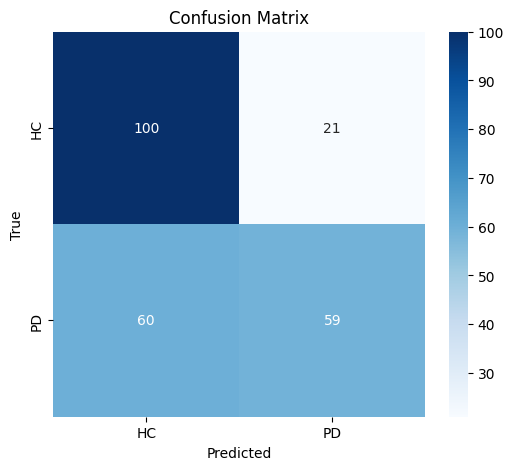

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["HC", "PD"], yticklabels=["HC", "PD"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.7375
Recall: 0.4958
F1 Score: 0.5930


In [63]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
auc_scores = []

for train_idx, val_idx in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    model = tuner.hypermodel.build(best_hps)
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=batch_size, validation_data=(X_val_fold, y_val_fold), callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)], verbose=0)

    y_val_pred = model.predict(X_val_fold)
    val_auc = roc_auc_score(y_val_fold, y_val_pred)
    val_accuracy = accuracy_score(y_val_fold, (y_val_pred > 0.5).astype(int))

    accuracies.append(val_accuracy)
    auc_scores.append(val_auc)

print(f"Average Accuracy across folds: {np.mean(accuracies):.4f}")
print(f"Average AUC across folds: {np.mean(auc_scores):.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Average Accuracy across folds: 0.6734
Average AUC across folds: 0.7337
